# Checking Model Asumption in Linear regression in Julia 
## The Anscombe exemples
The following script comes from "Statistics with Julia, Fundamentals for Data Science, Machine Learning and Artificial Intelligence", Yoni Nazarathy and Hayden Klol, Springer, 2021. 

Model 1. Coefficients: [3.0000909090909165, 0.5000909090909085]	 R squared: 0.6665424595087749
Model 2. Coefficients: [3.0009090909090794, 0.5000000000000012]	 R squared: 0.6662420337274841
Model 3. Coefficients: [3.002454545454549, 0.49972727272727235]	 R squared: 0.6663240410665592
Model 4. Coefficients: [3.001727272727266, 0.49990909090909164]	 R squared: 0.6667072568984653


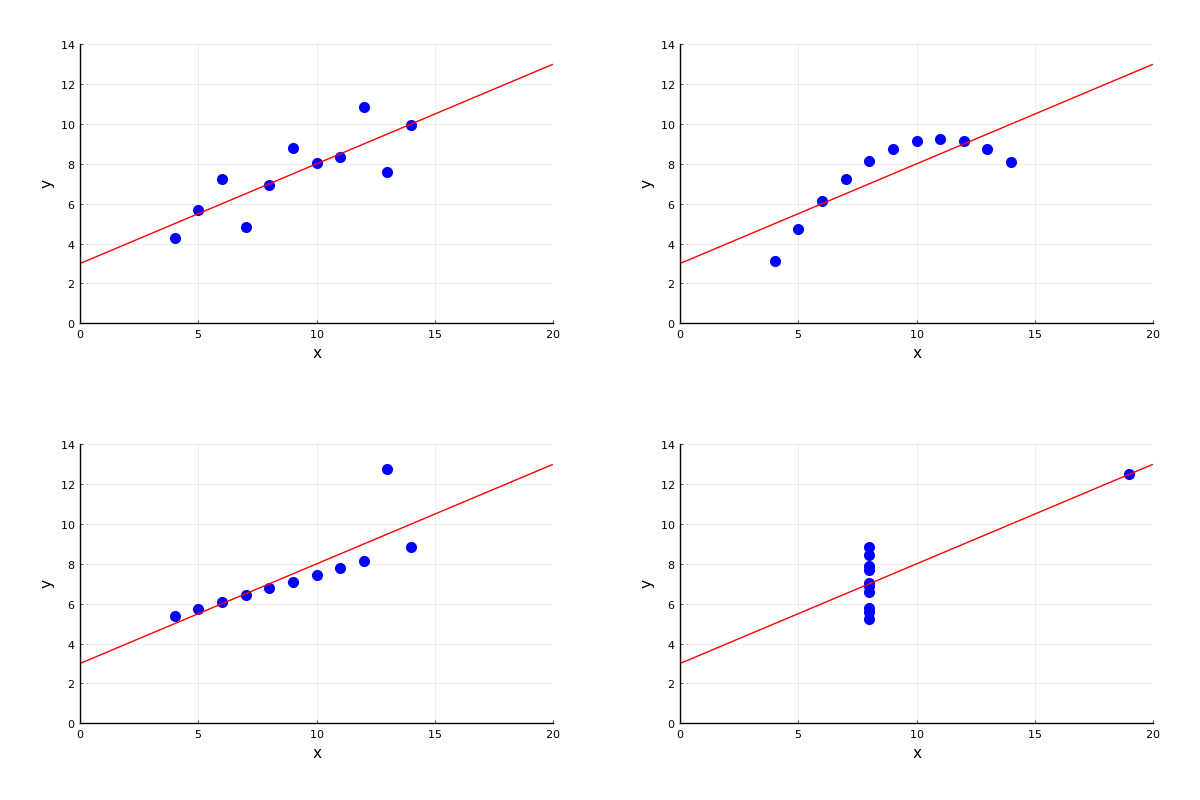

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [13]:
using RDatasets, DataFrames, GLM, Plots, StatsPlots, Measures; pyplot()

df = dataset("datasets", "anscombe")

model1 = lm(@formula(Y1 ~ X1), df)
model2 = lm(@formula(Y2 ~ X2), df)
model3 = lm(@formula(Y3 ~ X3), df)
model4 = lm(@formula(Y4 ~ X4), df)

println("Model 1. Coefficients: ", coef(model1),"\t R squared: ",r2(model1))
println("Model 2. Coefficients: ", coef(model2),"\t R squared: ",r2(model2))
println("Model 3. Coefficients: ", coef(model3),"\t R squared: ",r2(model3))
println("Model 4. Coefficients: ", coef(model4),"\t R squared: ",r2(model4))

yHat(model, X) = coef(model)' * [ 1 , X ] # coef(model) and [1, X] are vectors 
# the type of coef(model)' is LinearAlgebra.Adjoint{Float64, Vector{Float64}}
# so coef(model)' * [ 1 , X ] is the dot product between the 2 vectors

xlims = [0, 20]

p1 = scatter(df.X1, df.Y1, c=:blue, msw=0, ms=8)
p1 = plot!(xlims, [yHat(model1, x) for x in xlims], c=:red, xlims=(xlims))

p2 = scatter(df.X2, df.Y2, c=:blue, msw=0, ms=8)
p2 = plot!(xlims, [yHat(model2, x) for x in xlims], c=:red, xlims=(xlims))

p3 = scatter(df.X3, df.Y3, c=:blue, msw=0, ms=8)
p3 = plot!(xlims, [yHat(model3, x) for x in xlims], c=:red, xlims=(xlims))

p4 = scatter(df.X4, df.Y4, c=:blue, msw=0, ms=8)
p4 = plot!(xlims, [yHat(model4, x) for x in xlims], c=:red, msw=0, xlims=(xlims))

plot(p1, p2, p3, p4, layout = (2,2), xlims=(0,20), ylims=(0,14), 
	legend=:none, xlabel = "x", ylabel = "y",
    	size=(1200, 800), margin = 10mm)

### Comments

For this 4 examples, we have exactly the same result for the linear regression but
- For the top and left graph,  the linear model is correct
- For the top and right graph, the linear model is false; the true model seems to be $y=a+bx+cx^2$
- For the bottom and left graph, there is one outliers
- For the bottom and right graph, there is one influence 


## Residuals
We recall that the residuals are
$${r} = y-X\hat{\beta}=y-X(X^TX)^{-1}X^Ty = (I-H)y,$$
where $H = X(X^TX)^{-1}X^T$.
So the variance, covariance matrix of the residuals are $\sigma^2(I-H)$.

Definitions
- Standardized residuals : 
$$t_i = \frac{r_i}{\hat{\sigma}\sqrt{1-h_{ii}}}$$
- Studentized residuals
$$t_i^* = \frac{r_i}{\hat{\sigma}_{(i)}\sqrt{1-h_{ii}}}$$
where $\hat{\sigma}_{(i)}$ is the estimation of $\sigma$ obtained without the observation $i$.

### Exercise 
Compute the standardized residuals and plot these residuals versus the variable $x$ for the 4 linear models


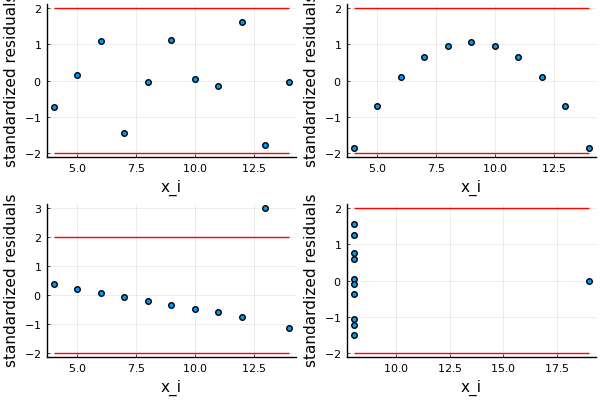

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [17]:

using LinearAlgebra

function standardized_residuals(model, i::Int)
    """ Compute the standardized residuals
     and plot these residuals versus the variable x for the 4 linear models
    """
    Xi = df[:,i]
    n = length(Xi)
    X = [ones(n) Xi]
    H = X*inv(X'*X)*X'
    t = residuals(model) ./ (dispersion(model.model)*sqrt.(1 .- diag(H)))
    p = scatter(Xi,t,xlabel="x_i",ylabel="standardized residuals")
    plot!(p,[minimum(Xi),maximum(Xi)],[2,2],c=:red)
    plot!(p,[minimum(Xi),maximum(Xi)],[-2,-2],c=:red)
    return t,p # t is the vector of standardized residuals and p is the plot
end

t1,p1 = standardized_residuals(model1, 1)
t2,p2 = standardized_residuals(model2, 2)
t3,p3 = standardized_residuals(model3, 3)
t4,p4 = standardized_residuals(model4, 4)
plot(p1,p2,p3,p4,legend=false)


### QQPlot

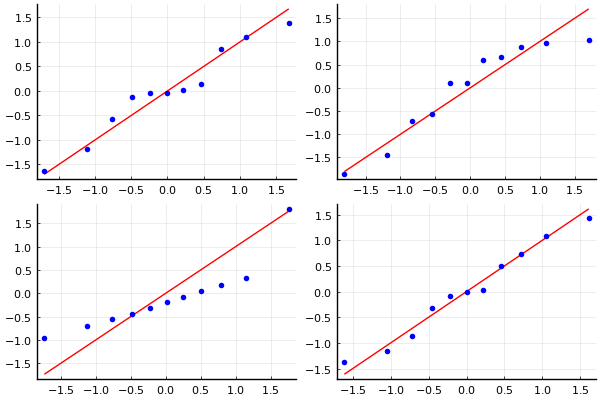

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [15]:
p1 = qqnorm(t1, msw=0, lm=2, c=[:red :blue], legend=false)
p2 = qqnorm(t2, msw=0, lm=2, c=[:red :blue], legend=false)
p3 = qqnorm(t3, msw=0, lm=2, c=[:red :blue], legend=false)
p4 = qqnorm(t4, msw=0, lm=2, c=[:red :blue], legend=false)
plot(p1,p2,p3,p4)

## Cook's distance

11×4 Matrix{Float64}:
 6.13979e-5   0.0523253   0.0117646      0.00716517
 0.000104247  0.0523253   0.00214148     0.0622595
 0.489209     0.0766572   1.39285        0.0203214
 0.061637     0.0578706   0.00547314     0.136718
 0.00159934   0.0314518   0.0259839      0.087238
 0.0003829    0.807869    0.300571       6.14881e-5
 0.126756     0.00137384  0.000517641    0.123947
 0.1227       0.807869    0.0338173    149.027
 0.27903      0.00137384  0.0595359      0.0839441
 0.154341     0.0314518   0.000354629    0.0334033
 0.00426801   0.0766572   0.00694781     0.00049809

Cook's distance


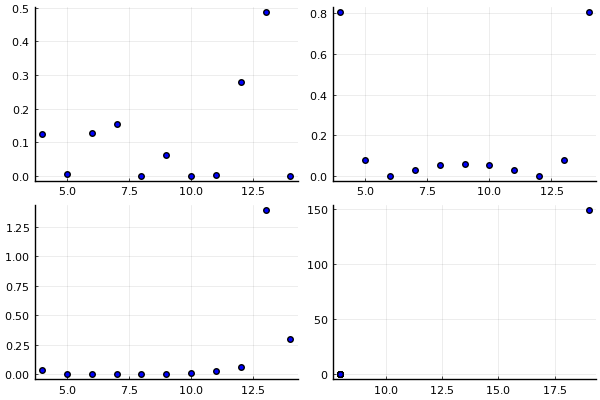

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [16]:
println("Cook's distance")
display([cooksdistance(model1) cooksdistance(model2) cooksdistance(model3) cooksdistance(model4)])
p1 = scatter(df.X1,cooksdistance(model1),c=:blue)
p2 = scatter(df.X2,cooksdistance(model2),c=:blue)
p3 = scatter(df.X3,cooksdistance(model3),c=:blue)
p4 = scatter(df.X4,cooksdistance(model4),c=:blue)
plot(p1,p2,p3,p4,legend=false)

There is also the LinRegOutliers package